<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [23]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


---

## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



**Respuesta 1**

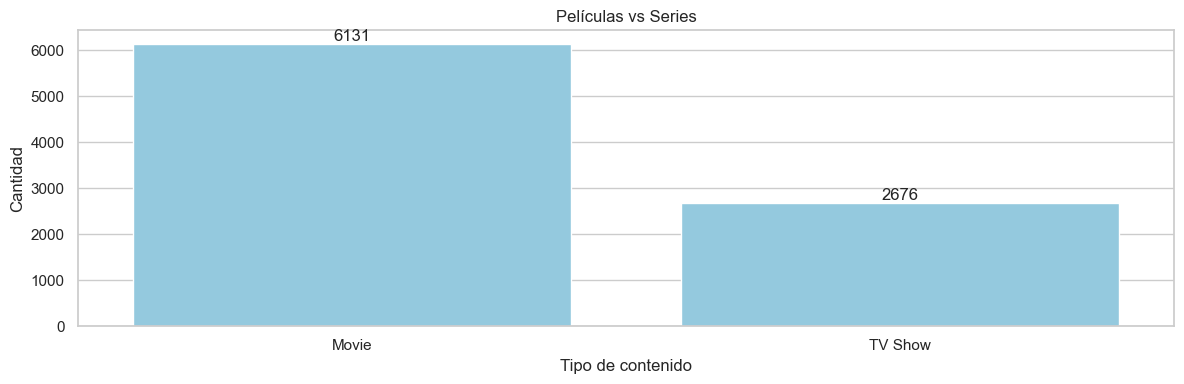

In [24]:
# seleccionar conjunto de datos
df_new1 = df.loc[lambda x: x["type"].isin(["Movie", "TV Show"])]

# gráfico de barras
plt.figure(figsize=(12, 4))
ax = sns.countplot(
    data=df_new1,
    x="type",
    color="skyblue"
)

# personalización
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.title("Películas vs Series")
plt.tight_layout()

# etiquetas con conteo
for c in ax.containers:
    ax.bar_label(c, fmt="%d")

plt.show()

Podemos notar una fuerte predominancia de Películas en Netflix, lo que implica una mayor probabilidad de que el usuario opte por ver una película en vez de una serie.

**Respuesta 2**

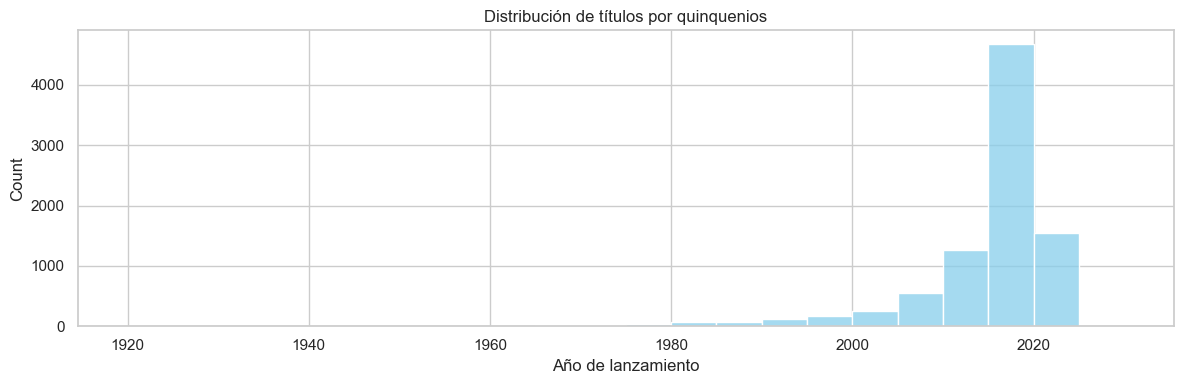

In [ ]:
import numpy as np

df_new2 = df.loc[lambda x: x["release_year"].notna()]
years = df_new2["release_year"].astype(int)

n = 10   # usar décadas n=10.
start = int(np.floor(years.min() / n) * n)
end   = int(np.ceil(years.max() / n) * n)


plt.figure(figsize=(12, 4))
sns.histplot(
    data=df_new2,
    x="release_year",
    bins=range(start, end + 5, 5),  # saltos de 5 años
    color="skyblue"
)

plt.xlabel("Año de lanzamiento")
plt.title("Distribución de títulos por quinquenios")
plt.tight_layout()
plt.show()


Del gráfico podemos ver que hay una fuerte predominancia en los títulos actuales, además entre 2000 y 2020 se ve un crecimiento exponencial de lanzamientos.

**Respuesta 3**

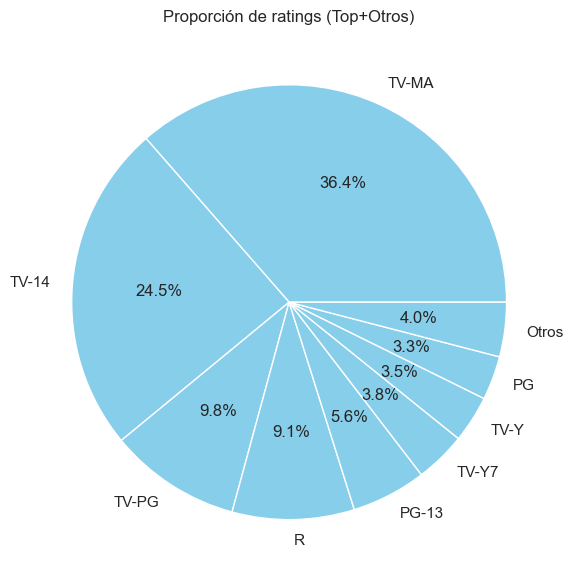

In [29]:
# seleccionar conjunto de datos
df_new3 = df.loc[lambda x: x["rating"].notna()]

# agrupar Top-8 y colapsar el resto en "Otros" (mejor legibilidad)
counts = df_new3["rating"].value_counts()
top = counts.head(8)
otros = counts.iloc[8:].sum()
plot_counts = pd.concat([top, pd.Series({"Otros": otros})])

plt.figure(figsize=(6, 6))
plot_counts.plot(kind="pie", autopct="%.1f%%", ylabel="", colors=["skyblue"]*len(plot_counts))
plt.title("Proporción de ratings (Top+Otros)")
plt.tight_layout()
plt.show()



La principales categorías son TV-14 y TV-MA, que ambas categorías sean dominantes significa que Netflix concentra gran parte de su catálogo en adolescentes en adelante.

---



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


**Respuesta 4**

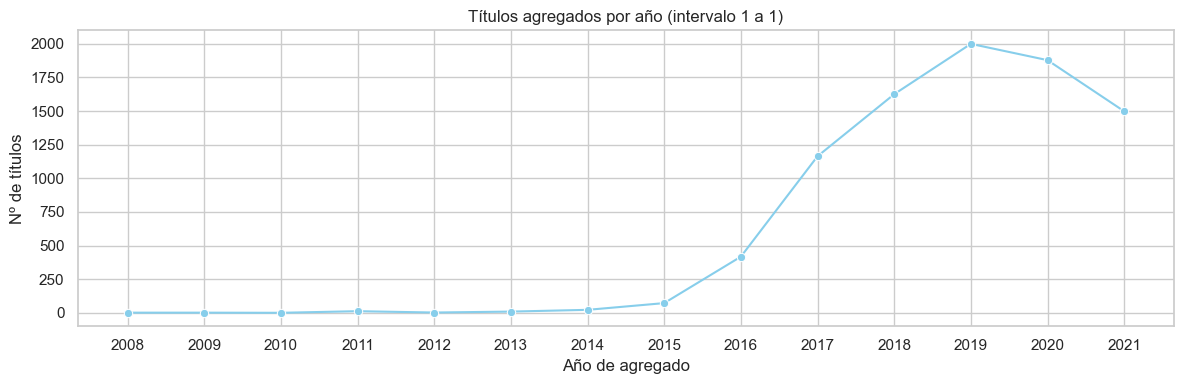

In [41]:
# Gráfico año a año
plt.figure(figsize=(12, 4))
ax = sns.lineplot(
    data=titles_per_year,
    x="year",
    y="show_id",
    marker="o",
    color="skyblue"
)

ax.set_xticks(titles_per_year["year"])

plt.xlabel("Año de agregado")
plt.ylabel("Nº de títulos")
plt.title("Títulos agregados por año (intervalo 1 a 1)")
plt.tight_layout()
plt.show()



El mayor salto suele coincidir con la expansión internacional de Netflix (post 2015)

**Respuesta 5**

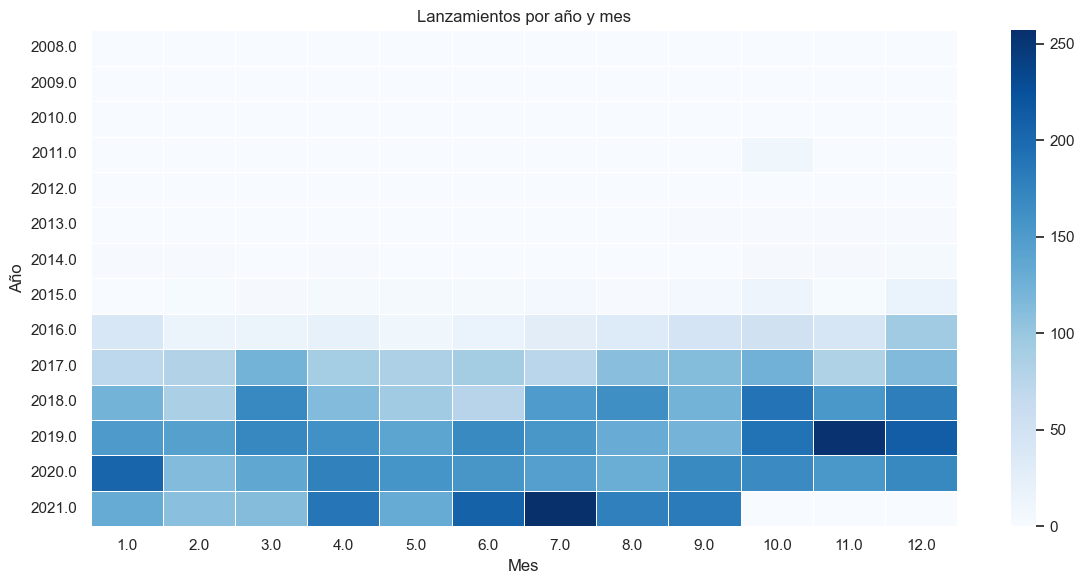

In [45]:
# Asegurarse de que date_added sea datetime
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

# Agrupar por año y mes
df_new5 = df.loc[lambda x: x["year_added"].notna() & x["month_added"].notna()]
heat_data = (
    df_new5.groupby(["year_added", "month_added"])["show_id"]
           .count()
           .reset_index()
)

# Crear matriz año × mes
heatmap = heat_data.pivot(index="year_added", columns="month_added", values="show_id").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap="Blues", linewidths=0.5)

plt.xlabel("Mes")
plt.ylabel("Año")
plt.title("Lanzamientos por año y mes")
plt.tight_layout()
plt.show()


El heatmap sugiere que los lanzamientos no se distribuyen de manera uniforme durante el año. Se aprecia un leve repunte el último trimestre de cada año , lo que podría indicar una estacionalidad estratégica.

**Respuesta 6**

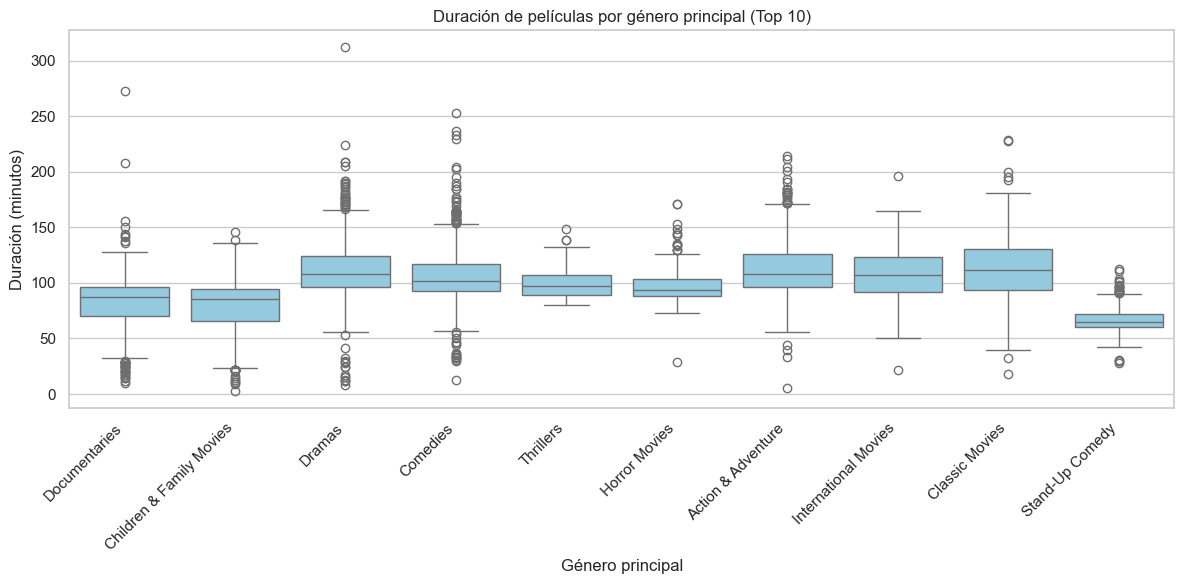

In [47]:
# Asegurar columna con minutos
def parse_duration(x):
    if pd.isna(x): return None
    if "Season" in x:   # para evitar mezclar series
        return None
    return int(x.split()[0])

df["duration_num"] = df["duration"].apply(parse_duration)

# Género principal
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()

# Filtrar solo películas con duración válida
df_movies = df.loc[(df["type"]=="Movie") & (df["duration_num"].notna()) & (df["main_genre"].notna())]

# Boxplot de duración por género principal (top 10 géneros más frecuentes)
top_genres = df_movies["main_genre"].value_counts().head(10).index
df_top = df_movies[df_movies["main_genre"].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x="main_genre",
    y="duration_num",
    color="skyblue"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Género principal")
plt.ylabel("Duración (minutos)")
plt.title("Duración de películas por género principal (Top 10)")
plt.tight_layout()
plt.show()


Los géneros Action, International Movies, Classic y Dramas son los que suelen durar más. 
 
 Además, los outliers indican una variabilidad extrema: algunas películas son mucho más cortas o largas de lo usual, principalmente en dramas, comedidas, acción y stand-up.

---

## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



**Respuesta 7**

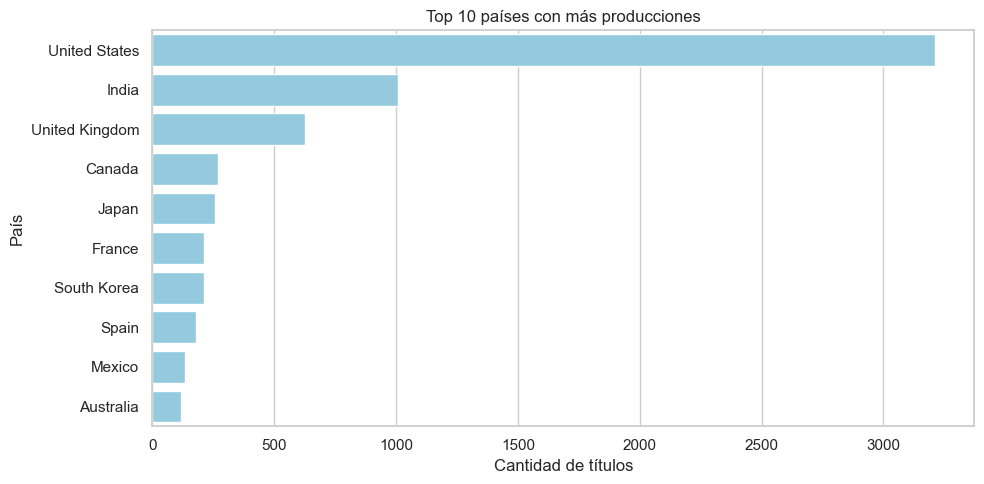

In [48]:
# Primer país de la lista
df["country_first"] = df["country"].str.split(",").str[0].str.strip()

top_countries = df["country_first"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, color="skyblue")
plt.xlabel("Cantidad de títulos")
plt.ylabel("País")
plt.title("Top 10 países con más producciones")
plt.tight_layout()
plt.show()


Los países que dominan las producciones son USA, India y UK. Era esperable que USA dominara debido a que Hollywood ha sido el epicentro de la industria audiovisual durante más de un siglo.

**Respuesta 8**

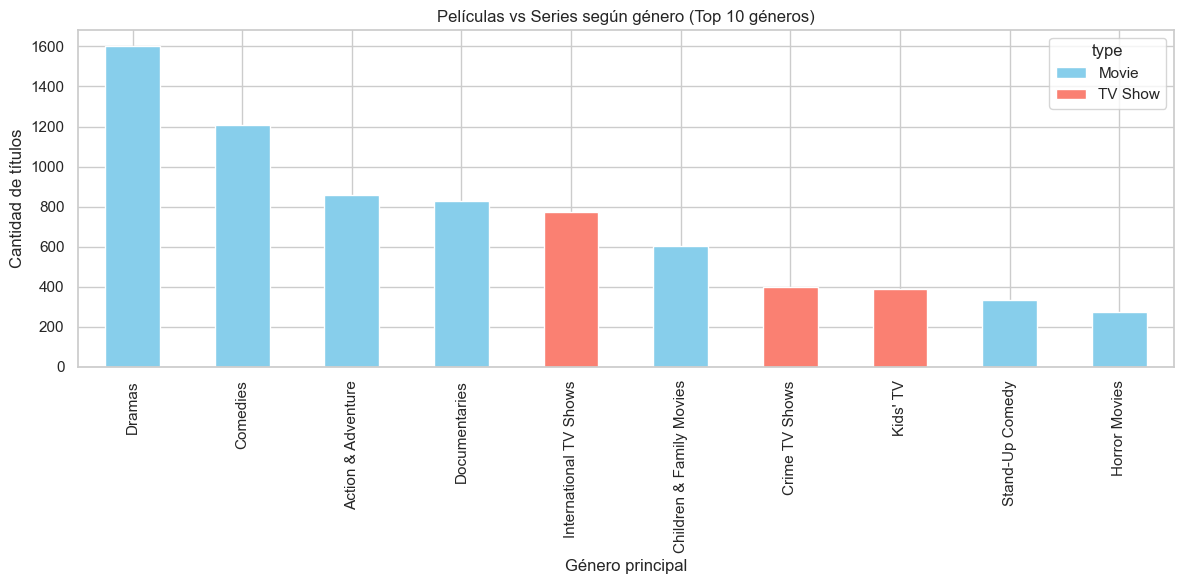

In [49]:
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()

genre_type = pd.crosstab(df["main_genre"], df["type"])

# Mantener solo los 10 géneros más frecuentes
top_genres = genre_type.sum(axis=1).sort_values(ascending=False).head(10).index
genre_type_top = genre_type.loc[top_genres]

# Gráfico de barras apiladas
genre_type_top.plot(kind="bar", stacked=True, figsize=(12, 6), color=["skyblue","salmon"])
plt.xlabel("Género principal")
plt.ylabel("Cantidad de títulos")
plt.title("Películas vs Series según género (Top 10 géneros)")
plt.tight_layout()
plt.show()


Se evidencia una mayor cantidad de géneros en Películas.

**Pregunta 9**

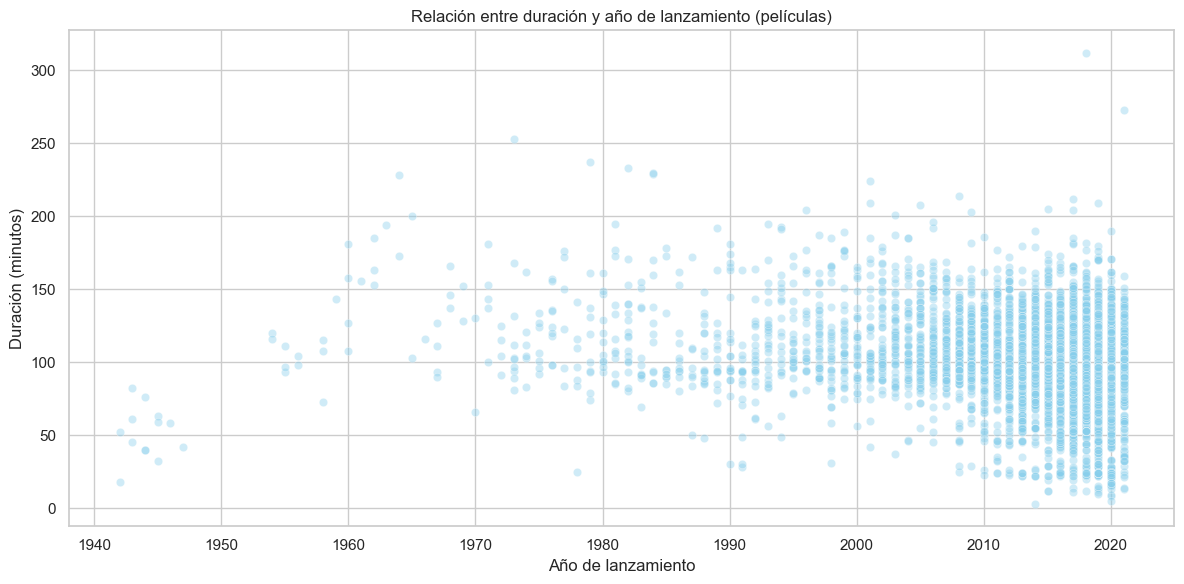

In [50]:
# Asegurar columna con minutos
def parse_duration(x):
    if pd.isna(x): return None
    if "Season" in x:   # para series
        return None
    return int(x.split()[0])

df["duration_num"] = df["duration"].apply(parse_duration)

# Filtrar películas
df_movies = df.loc[(df["type"]=="Movie") & (df["duration_num"].notna())]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_movies,
    x="release_year",
    y="duration_num",
    alpha=0.4,
    color="skyblue"
)

plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (minutos)")
plt.title("Relación entre duración y año de lanzamiento (películas)")
plt.tight_layout()
plt.show()


Se puede ver que la duración se centra en los 100 minutos, sin embargo la varianza ha crecido a lo largo del tiempo.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

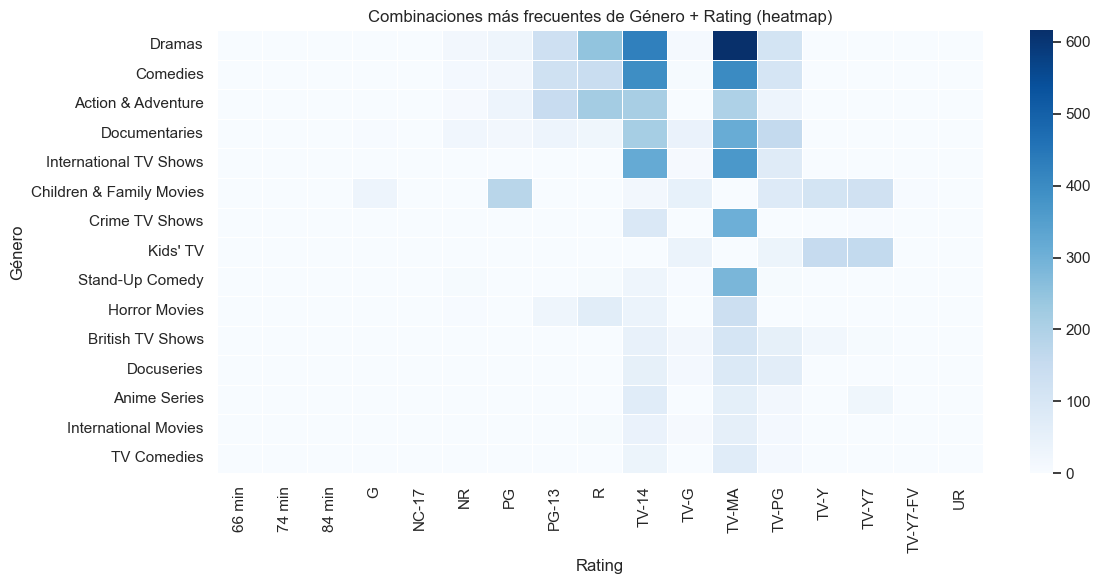

In [52]:
# Asegurar género principal
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()

# Tabla de frecuencias género × rating
combo = pd.crosstab(df["main_genre"], df["rating"])

# Heatmap (solo top 15 géneros para que no quede ilegible)
top_genres = df["main_genre"].value_counts().head(15).index
combo_top = combo.loc[top_genres]

plt.figure(figsize=(12, 6))
sns.heatmap(combo_top, cmap="Blues", linewidths=0.5, annot=False)
plt.xlabel("Rating")
plt.ylabel("Género")
plt.title("Combinaciones más frecuentes de Género + Rating (heatmap)")
plt.tight_layout()
plt.show()


El heatmap evidencia que los géneros más populares de Netflix, como dramas, comedias y acción, se concentran en clasificaciones TV-MA y TV-14, dirigidas principalmente a un público de adultos y adolescentes. En contraste, los géneros infantiles y familiares se distribuyen en ratings como TV-Y, TV-G y TV-PG que, por la intensidad, ocupan un lugar más reducido.